In [54]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Path-Tracing Tools for Line/Curve-Drawing
import matplotlib.path as mpath

# Tools for Text Imposition
from matplotlib.text import Text

# Line/Curve-Styling Tools
import matplotlib.lines as mlines

# Specialized Line-Drawing Utility
from matplotlib.lines import Line2D

# 2D Polygon-Drawing Tools
import matplotlib.patches as mpatches

# Grid Structuring Tools
import matplotlib.gridspec as gridspec

# 3D Plotting Utilities
from mpl_toolkits.mplot3d import Axes3D

# Tick Locating/Formatting Tools
from matplotlib.ticker import FuncFormatter

# Specialized Polygon Imposition Tools
from matplotlib.patches import Rectangle, Polygon

# Collection of Prebuilt Patch Objects
from matplotlib.collections import PatchCollection

In [55]:
DATAPATH = "healthcare_dataset.csv"
dataset = pd.read_csv(DATAPATH)


# Data Dictionary 

In [56]:
FEATURES = dataset.columns.tolist()

FEATURES

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [57]:
REFPATH = "healthcare_reference.csv"

DESCRIPTORS = [
    "Name of the patient associated with the healthcare record",
    "Age of the patient at the time of admission, expressed in years",
    "Gender of the patient, either 'Male' or 'Female'",
    "Patient's blood type, which can be one of the common blood types (e.g., 'A+', 'O-', etc.)",
    "Specifies the primary medical condition or diagnosis associated with the patient, such as 'Diabetes', 'Hypertension', 'Asthma', and more",
    "Date on which the patient was admitted to the healthcare facility",
    "The name of the doctor responsible for the patient's care during their admission",
    "Identifies the healthcare facility or hospital where the patient was admitted",
    "Indicates the patient's insurance provider, which can be one of several options, including 'Aetna', 'Blue Cross', 'Cigna', 'UnitedHealthcare', and 'Medicare'",
    "Amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number",
    "The room number where the patient was accommodated during their admission",
    "Specifies the type of admission, which can be 'Emergency', 'Elective', or 'Urgent', reflecting the circumstances of the admission",
    "The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range",
    "Identifies a medication prescribed or administered to the patient during their admission. Examples include 'Aspirin', 'Ibuprofen', 'Penicillin', 'Paracetamol', and 'Lipitor'",
    "Describes the results of a medical test conducted during the patient's admission. Possible values include 'Normal', 'Abnormal', or 'Inconclusive', indicating the outcome of the test",
]

In [58]:

def operate_data_dictionary(features, descriptors, method="set", refpath=None):
  """ Operational function to work in creating or getting data dictionary. """
  if method == "set":
    # Produce dictionary-wrapped key-value associations of feature summaries
    data_dictionary = dict(zip(FEATURES, DESCRIPTORS))
    # Convert data dictionary to cleaner reference table
    reference = pd.DataFrame(data_dictionary, index=[0])
    # Save reference table for future access
    if refpath is not None and type(refpath) == str:
      reference.to_csv(refpath, index=False)
  if method == "get":
    # Get reference table from saved data dictionary
    if refpath is not None and type(refpath) == str:
      return pd.read_csv(refpath)
    else:
      raise TypeError("Saved file for data dictionary not found.")

def encode_categorical_feature(dataset, feature, encoding="label"):
  """ Custom function to encode categorical features using label-schema. """
  # Instantiate encoder architecture
  if encoding == "label":
    encoder = LabelEncoder()
  # Transform dataset feature using labeling schema (performs in-place)
  dataset[feature] = encoder.fit_transform(dataset[feature])
  # Get fitted encoder (just in case)
  return encoder

In [59]:
# Set data dictionary as reference table
operate_data_dictionary(features=FEATURES,
                        descriptors=DESCRIPTORS,
                        method="set",
                        refpath=REFPATH)

In [60]:
# Get data dictionary as reference table
reference = operate_data_dictionary(features=FEATURES,
                                    descriptors=DESCRIPTORS,
                                    method="get",
                                    refpath=REFPATH)

In [61]:
reference.T

,0
Name,Name of the patient associated with the health...
Age,"Age of the patient at the time of admission, e..."
Gender,"Gender of the patient, either 'Male' or 'Female'"
Blood Type,"Patient's blood type, which can be one of the ..."
Medical Condition,Specifies the primary medical condition or dia...
Date of Admission,Date on which the patient was admitted to the ...
Doctor,The name of the doctor responsible for the pat...
Hospital,Identifies the healthcare facility or hospital...
Insurance Provider,"Indicates the patient's insurance provider, wh..."
Billing Amount,Amount of money billed for the patient's healt...


# Data Cleaning / Preprocessing

len(dataset)

np.shape(dataset)

rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

In [62]:
dataset.isna().sum()



try:
  dataset.drop(columns=all, inplace=True)
except:
  KeyError("Column(s) already dropped.")


dataset.dropna(axis=0, inplace = True)



dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [63]:
display(dataset)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [64]:
# Formatting Change to Name Column 
dataset['Name'] = dataset['Name'].str.lower().str.title()

# Test
dataset.head()
    

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [65]:
# Format Changing Billing Amount to Round to near tenth 
dataset['Billing Amount'] = dataset['Billing Amount'].round(2)

#Test 
dataset.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


# Age Distribution Analysis 

In [66]:
print(dataset["Age"].describe())

count    55500.000000
mean        51.539459
std         19.602454
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64


/var/folders/6t/7rsnpsl57gs140xc9md0hw1r0000gn/T/ipykernel_3925/4023685061.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y = age_group_counts.values, palette = "coolwarm")


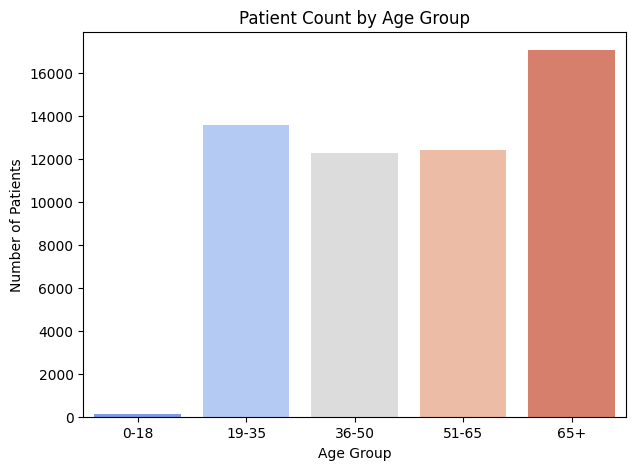

In [67]:
bins = [0,18,35,50,65,100]
labels = ["0-18", "19-35", "36-50", "51-65", "65+"]

dataset["Age Group"] = pd.cut(dataset["Age"], bins = bins, labels=labels, right = False)

age_group_counts = dataset["Age Group"].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.barplot(x=age_group_counts.index, y = age_group_counts.values, palette = "coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.title("Patient Count by Age Group")
plt.show()

In [72]:
dataset.sort_values('Gender')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group
27749,Joseph Coffey,64,Female,O+,Cancer,2023-02-19,Kelly Moore,Rodriguez PLC,Medicare,9913.84,330,Urgent,2023-03-07,Lipitor,Normal,51-65
30808,Cynthia Buchanan,55,Female,AB-,Asthma,2020-02-05,Melissa Cummings,and Small Sons,Medicare,7764.12,486,Urgent,2020-02-14,Lipitor,Inconclusive,51-65
30811,Frederick Brown,85,Female,O+,Asthma,2022-05-09,Barbara Thomas,"Hawkins Davis, and Perez",Cigna,39652.10,302,Urgent,2022-05-23,Penicillin,Abnormal,65+
30812,Mrs. Nicole Nelson,53,Female,O+,Asthma,2019-10-06,Haley Hicks,Sons and Stevenson,Aetna,43646.81,291,Urgent,2019-10-13,Lipitor,Normal,51-65
30813,Juan Osborne,20,Female,AB+,Diabetes,2021-04-28,Joe Lawson,Garcia-Erickson,Blue Cross,-317.63,324,Emergency,2021-05-20,Ibuprofen,Inconclusive,19-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436,Kristin Williams,47,Male,B+,Diabetes,2022-08-19,Tanya Calhoun,"Gonzalez Wolf Wall, and",Cigna,45499.68,344,Elective,2022-09-04,Penicillin,Normal,36-50
32541,Jennifer Wang,21,Male,A+,Hypertension,2024-02-18,Bradley Bailey,"Shelton Scott, Castaneda and",Aetna,34377.51,290,Urgent,2024-03-11,Paracetamol,Inconclusive,19-35
11437,Julie Young,77,Male,O-,Hypertension,2019-12-08,Frederick Castillo,"Thompson and Herrera, Phillips",Medicare,7585.86,121,Elective,2019-12-29,Penicillin,Abnormal,65+
32538,Joel Cortez,38,Male,B-,Cancer,2024-02-14,Kevin Watson,LLC Davis,Cigna,11558.95,393,Emergency,2024-03-14,Ibuprofen,Normal,36-50
